In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
# imports

from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, concatenate, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import imshow
import sys, os
from glob import glob
from os import walk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

In [3]:
# VARS
visualizations_dir = '.\VIZUAL2'

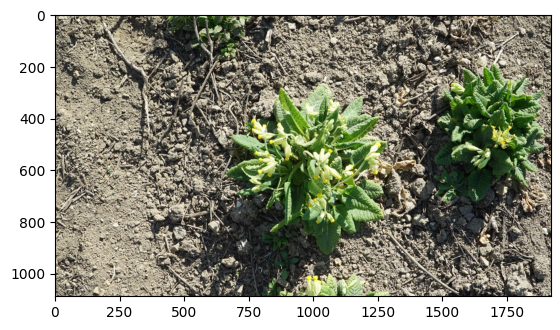

In [4]:
imshow(image.load_img('../Data/CropAndWeed/images/ave-0035-0004.jpg'))

In [5]:
data = {}
DATASET_PATH = '../Data/CropAndWeed/'

for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\images'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['image_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'image_path': os.path.join(os.path.normpath(dirpath), filename)}

for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\\bboxes'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['bboxes_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'bboxes_path': os.path.join(os.path.normpath(dirpath), filename)}


for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\labelIds\CropAndWeed'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['labelIds_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'labelIds_path': os.path.join(os.path.normpath(dirpath), filename)}

for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\params'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['params_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'params_path': os.path.join(os.path.normpath(dirpath), filename)}

print(data['ave-0000-0001'])

{'image_path': '..\\Data\\CropAndWeed\\images\\ave-0000-0001.jpg', 'bboxes_path': '..\\Data\\CropAndWeed\\bboxes\\ave-0000-0001.csv', 'labelIds_path': '..\\Data\\CropAndWeed\\labelIds\\CropAndWeed\\ave-0000-0001.png', 'params_path': '..\\Data\\CropAndWeed\\params\\ave-0000-0001.csv'}


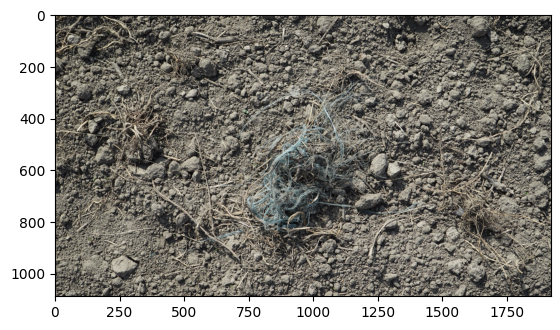

In [6]:
imshow(image.load_img(data['ave-0000-0002']['image_path']))

In [7]:
label_data = {
    0: ('Soil', (0, 0, 0)),
    1: ('Maize', (255, 0, 0)),
    2: ('Maize two-leaf stage', (234, 0, 0)),
    3: ('Maize four-leaf stage', (212, 0, 0)),
    4: ('Maize six-leaf stage', (191, 0, 0)),
    5: ('Maize eight-leaf stage', (170, 0, 0)),
    6: ('Maize max', (149, 0, 0)),
    7: ('Sugar beet', (255, 85, 0)),
    8: ('Sugar beet two-leaf stage', (234, 78, 0)),
    9: ('Sugar beet four-leaf stage', (212, 71, 0)),
    10: ('Sugar beet six-leaf stage', (191, 64, 0)),
    11: ('Sugar beet eight-leaf stage', (170, 57, 0)),
    12: ('Sugar beet Max', (149, 50, 0)),
    13: ('Pea', (255, 170, 0)),
    14: ('Courgette', (255, 255, 0)),
    15: ('Pumpkins', (170, 255, 0)),
    16: ('Radish', (85, 255, 0)),
    17: ('Asparagus', (0, 255, 0)),
    18: ('Potato', (0, 255, 85)),
    19: ('Flat leaf parsley', (0, 255, 170)),
    20: ('Curly leaf parsley', (0, 255, 255)),
    21: ('Cowslip', (0, 170, 255)),
    22: ('Poppy', (0, 85, 255)),
    23: ('Hemp', (0, 0, 255)),
    24: ('Sunflower', (85, 0, 255)),
    25: ('Sage', (170, 0, 255)),
    26: ('Common bean', (255, 0, 255)),
    27: ('Faba bean', (255, 0, 170)),
    28: ('Clover', (255, 0, 85)),
    29: ('Hybrid goosefoot', (255, 188, 178)),
    30: ('Black-bindweed', (255, 207, 178)),
    31: ('Cockspur grass', (255, 226, 178)),
    32: ('Red-root amaranth', (255, 245, 178)),
    33: ('White goosefoot', (245, 255, 178)),
    34: ('Thorn apple', (226, 255, 178)),
    35: ('Potato weed', (207, 255, 178)),
    36: ('German chamomile', (188, 255, 178)),
    37: ('Saltbush', (178, 255, 188)),
    38: ('Creeping thistle', (178, 255, 207)),
    39: ('Field milk thistle', (178, 255, 226)),
    40: ('Purslane', (178, 255, 245)),
    41: ('Black nightshade', (178, 245, 255)),
    42: ('Mercuries', (178, 226, 255)),
    43: ('Spurge', (178, 207, 255)),
    44: ('Pale persicaria', (178, 188, 255)),
    45: ('Geraniums', (188, 178, 255)),
    46: ('Cleavers', (207, 178, 255)),
    47: ('Whitetop', (226, 178, 255)),
    48: ('Meadow-grass', (245, 178, 255)),
    49: ('Frosted orach', (255, 178, 245)),
    50: ('Black horehound', (255, 178, 226)),
    51: ('Shepherds purse', (255, 178, 207)),
    52: ('Field bindweed', (255, 178, 188)),
    53: ('Common mugwort', (255, 194, 178)),
    54: ('Hedge mustard', (255, 213, 178)),
    55: ('Groundsel', (255, 219, 178)),
    56: ('Speedwell', (255, 232, 178)),
    57: ('Broadleaf plantain', (255, 238, 178)),
    58: ('White ball-mustard', (255, 251, 178)),
    59: ('Peppermint', (255, 212, 0)),
    60: ('Field pennycress', (239, 255, 178)),
    61: ('Corn spurry', (233, 255, 178)),
    62: ('Purple crabgrass', (220, 255, 178)),
    63: ('Common fumitory', (214, 255, 178)),
    64: ('Ivy-leaved speedwell', (201, 255, 178)),
    65: ('Annual meadow grass', (195, 255, 178)),
    66: ('Redshank', (182, 255, 178)),
    67: ('Common hemp-nettle', (178, 255, 194)),
    68: ('Rough meadow-grass', (178, 255, 200)),
    69: ('Green bristlegrass', (178, 255, 213)),
    70: ('Small geranium', (178, 255, 220)),
    71: ('Cornflower', (178, 255, 232)),
    72: ('Common corn-cockle', (178, 255, 238)),
    73: ('Creeping crowfoot', (178, 255, 251)),
    74: ('Wall barley', (178, 239, 255)),
    75: ('Annual fescue', (178, 233, 255)),
    76: ('Purple dead-nettle', (178, 220, 255)),
    77: ('Ribwort plantain', (178, 214, 255)),
    78: ('Pineappleweed', (178, 201, 255)),
    79: ('Common chickweed', (178, 195, 255)),
    80: ('Hedge mustard', (178, 182, 255)),
    81: ('Soft brome', (194, 178, 255)),
    82: ('Wild pansy', (200, 178, 255)),
    83: ('Yellow rocket', (213, 178, 255)),
    84: ('Common wild oat', (219, 178, 255)),
    85: ('Red poppy', (232, 178, 255)),
    86: ('Rye brome', (238, 178, 255)),
    87: ('Knotgrass', (251, 178, 255)),
    88: ('Prickly lettuce', (255, 178, 239)),
    89: ('Copse-bindweed', (255, 178, 233)),
    90: ('Manyseeds', (255, 178, 220)),
    91: ('Common buckwheat', (255, 178, 214)),
    92: ('Chives', (212, 255, 0)),
    93: ('Garlic', (127, 255, 0)),
    94: ('Soybean', (42, 255, 0)),
    95: ('Wild carrot', (244, 255, 0)),
    96: ('Field mustard', (159, 255, 0)),
    97: ('Giant fennel', (74, 255, 0)),
    98: ('Common horsetail', (10, 255, 0)),
    99: ('Common dandelion', (202, 255, 0)),
    255: ('Vegetation', (128, 128, 128))}

In [8]:
# Resize

def resize(input_image, input_mask):
   input_image = tf.image.resize(input_image, (256, 256), method="nearest")
   input_mask = tf.image.resize(input_mask, (256, 256), method="nearest")
   return input_image, input_mask

def normalize(input_image, input_mask):
   input_image = tf.cast(input_image, tf.float32) / 255.0
   input_mask -= 1
   return input_image, input_mask

In [9]:
def load_image_train(datapoint):
   input_image = cv2.imread(datapoint["image_path"])
   input_mask = cv2.imread(datapoint["labelIds_path"])
   input_image, input_mask = resize(input_image, input_mask)
   input_image, input_mask = normalize(input_image, input_mask)
   return input_image, input_mask

def load_image_test(datapoint):
   input_image = datapoint["image_path"]
   input_mask = datapoint["labelIds_path"]
   input_image, input_mask = resize(input_image, input_mask)
   input_image, input_mask = normalize(input_image, input_mask)
   return input_image, input_mask

In [10]:
# Normalize pixels
images = []
masks = []
i = 0

for key in data:
    if i < 500:
        X, Y = load_image_train(data[key])
        images.append(X)
        masks.append(Y)
    i+=1


images = np.array(images)
masks = np.array(masks)
# Test Train Split

x_train, x_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)


In [11]:
print(x_train.shape)

(400, 256, 256, 3)


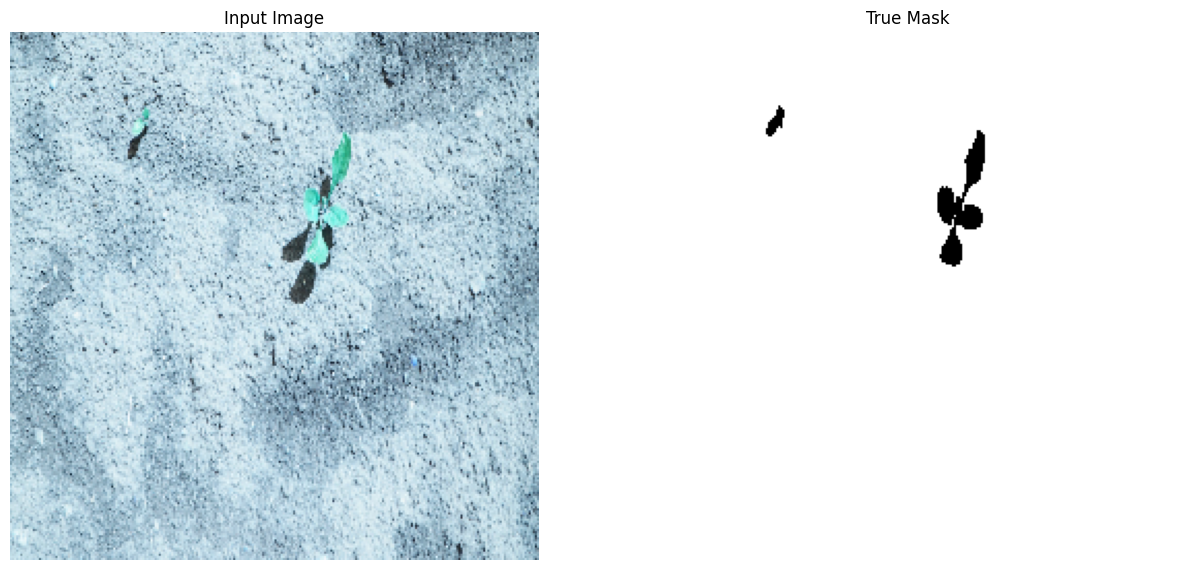

In [12]:
#Visualize
def display(display_list):
 plt.figure(figsize=(15, 15))
 title = ["Input Image", "True Mask", "Predicted Mask"]
 for i in range(len(display_list)):
   plt.subplot(1, len(display_list), i+1)
   plt.title(title[i])
   plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
   plt.axis("off")
 plt.show()

random_index = np.random.choice(len(x_train))
sample_image, sample_mask = x_train[random_index], y_train[random_index]
display([sample_image, sample_mask])

In [13]:
i = Input(shape=x_train[0].shape)
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(i)
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)

    # Decoder
up1 = UpSampling2D(size=(2, 2))(conv3)
concat1 = concatenate([up1, conv2], axis=-1)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat1)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)

up2 = UpSampling2D(size=(2, 2))(conv4)
concat2 = concatenate([up2, conv1], axis=-1)
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat2)
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)

outputs = Conv2D(3, 1, activation='sigmoid')(conv5)

model = Model(i, outputs)


In [14]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=5, epochs=5)

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.0696 - loss: -773793952431079424.0000 - val_accuracy: 0.0000e+00 - val_loss: -182579077894901858304.0000
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.7719 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan


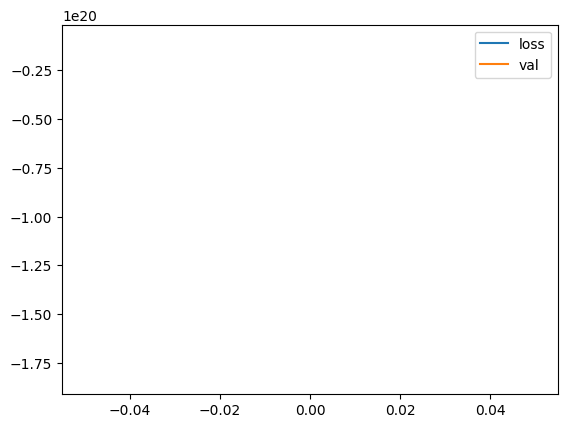

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val')
plt.legend()

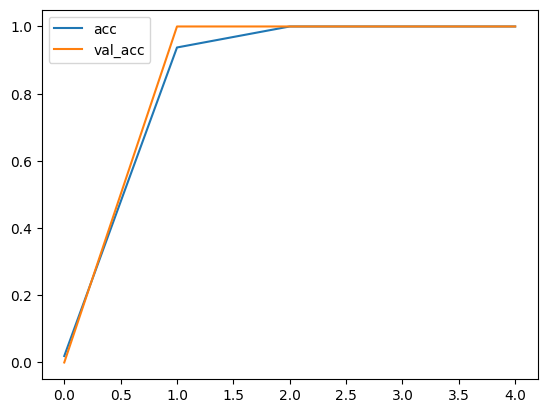

In [16]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
# for i in range(len(masks)):
#     sss = (masks[i] * 255).astype('uint8')
#     cv2.imwrite(os.path.normpath( os.path.join(visualizations_dir, f"{i}_v.jpg")), sss)

In [18]:
# pred= model.predict(x_val)

In [19]:
# print(len(pred), len(y_val))

# for i in range(len(pred)):
#     diff = pred[i] - y_val[i]
#     print(diff)
    

In [20]:
# for i in range(len(pred)):
#     sss = (pred[i] * 255).astype('uint8')
#     cv2.imwrite(os.path.normpath( os.path.join(visualizations_dir, f"{i}_v.jpg")), sss)

In [21]:
def create_mask(pred_mask):
 pred_mask = tf.argmax(pred_mask, axis=-1)
 pred_mask = pred_mask[..., tf.newaxis]
 return pred_mask[0]

In [22]:
print(images[10].shape)

(256, 256, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
(1, 256, 256, 3)


c:\Users\ub61555\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\keras\src\utils\image_utils.py:99: RuntimeWarning: invalid value encountered in cast
  return pil_image.fromarray(x.astype("uint8"), "RGB")


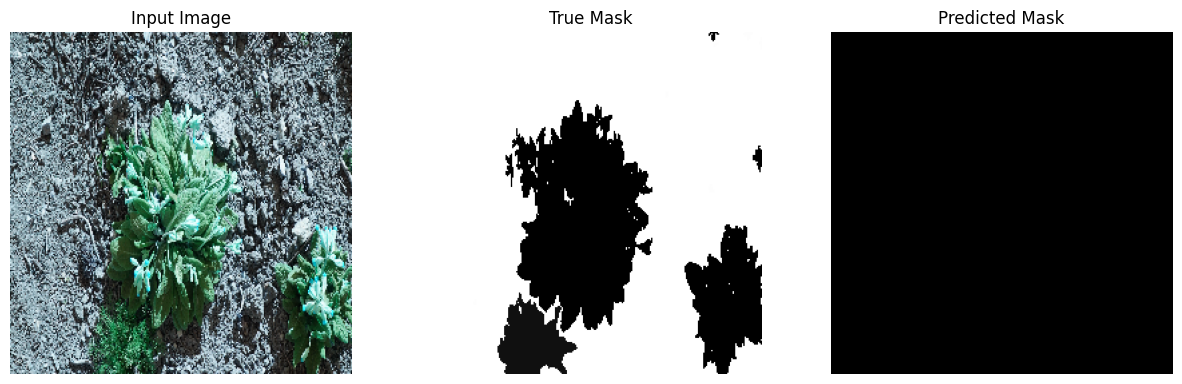

In [23]:
index = 12

x = np.expand_dims(images[index], axis=0)
pred_mask = model.predict(x)
print(pred_mask.shape)
display([images[index], masks[index], pred_mask[0]])